<a href="https://colab.research.google.com/github/singhvarun404/AIML_2020/blob/master/Aug_12_Linear_Regression_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
date = 12
topic = "Linear Regression"
print("August: {} \nTopic: {}".format(date,topic))

August: 12 
Topic: Linear Regression


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

**Loading and reshaping the data**

In [4]:
sal_df = pd.read_csv("Salary_Data.csv")
sal_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [10]:
x_feat = sal_df['YearsExperience'].values
x_feat

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [11]:
y_tar = sal_df['Salary'].values
y_tar

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [12]:
x_feat.shape ### shape should be (no. of samples, no. of features)

(30,)

In [14]:
x_feat = x_feat.reshape(len(x_feat),1)
y_tar = y_tar.reshape(len(y_tar),1)
x_feat.shape

(30, 1)

**Splitting the data into training and testing**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
###random splitting
x_feat_train, x_feat_test, y_tar_train, y_tar_test = train_test_split(x_feat,y_tar,test_size=0.20)

**Building and Training the model**

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()  ###Building an object

In [18]:
model.fit(x_feat_train,y_tar_train) ###Training the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Predicting, Plotting and Evaluating**

In [20]:
y_pred = model.predict(x_feat_test)
y_pred

array([[ 39303.48783749],
       [ 53558.93346292],
       [115332.5311731 ],
       [ 81119.46167208],
       [110580.71596463],
       [ 82069.82471377]])

In [21]:
y_tar_test

array([[ 37731.],
       [ 60150.],
       [116969.],
       [ 81363.],
       [105582.],
       [ 93940.]])

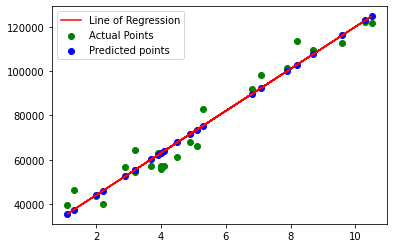

In [26]:
###Plotting line of regression(Training samples)
plt.scatter(x_feat_train,y_tar_train,color = "green", label = "Actual Points")
plt.scatter(x_feat_train,model.predict(x_feat_train),color = "blue", label = "Predicted points")
plt.plot(x_feat_train,model.predict(x_feat_train),color = "red", label = "Line of Regression")
plt.legend(loc=2)
plt.show()

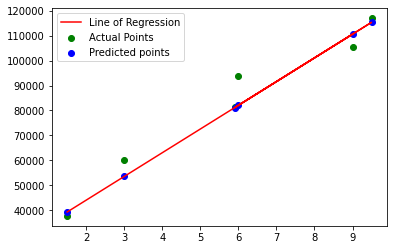

In [27]:
###Plotting line of regression(Testing samples)
plt.scatter(x_feat_test,y_tar_test,color = "green", label = "Actual Points")
plt.scatter(x_feat_test,y_pred,color = "blue", label = "Predicted points")
plt.plot(x_feat_test,y_pred,color = "red", label = "Line of Regression")
plt.legend(loc=2)
plt.show()

In [28]:
### Accuracy Metric
from sklearn.metrics import r2_score
r2_sal = r2_score(y_tar_test,y_pred)
r2_sal

0.9507568030854814

In [29]:
### Equation of line
m = model.coef_
c = model.intercept_
print(m,c)

[[9503.63041695]] [25048.04221207]


**Predicting new sample**

In [30]:
y = m * 15 + c
y

array([[167602.49846633]])

In [32]:
model.predict([[15]])

array([[167602.49846633]])

**Saving the model**

In [33]:
from sklearn.externals import joblib
joblib.dump(model, 'lrmodel.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['lrmodel.pkl']

**Loading the saved model**

In [34]:
lrmodel = joblib.load("lrmodel.pkl")

In [36]:
lrmodel.predict([[15]])

array([[167602.49846633]])

**Function for Salary prediction**

In [46]:
import numpy as np
def Salary_Prediction():
  expears = int(input("Enter the experience in years: "))
  salary = lrmodel.predict([[expears]])
  salary = np.round(salary)
  return "Salary of the employee : " + str(salary[0][0])

In [47]:
Salary_Prediction()

Enter the experience in years: 30


'Salary of the employee : 310157.0'